In [368]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [369]:
# To import the data
df_leads_original = pd.read_csv('Leads.csv')
# To keep copy of original data
df_leads = df_leads_original.copy()
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [370]:
#Inspecting the shape
df_leads.shape

(9240, 37)

In [371]:
#To get an idea of the numeric values
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [372]:
#Listing down all the columns along with name ,no of non null values,datatype
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [373]:
# To check for duplicates
df_leads.loc[df_leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [374]:
# To check for duplicates in columns
print(sum(df_leads.duplicated(subset = 'Lead Number')))
print(sum(df_leads.duplicated(subset = 'Prospect ID')))

0
0


In [375]:
# As the values in these columns are different for each entry/row, there are just indicative of the ID and are not important from an analysis point of view. Hence, can be dropped.
df_leads = df_leads.drop(['Lead Number','Prospect ID'],1)

In [376]:
# it can be seen, there are select values in many columns. This means that the person did not select any option for the given field. Hence, these are like NULL values.
# # To convert 'Select' values to NaN
df_leads = df_leads.replace('Select', np.nan)

In [377]:
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [378]:
# To drop columns with more than 50% of missing values except the variable 'Lead Quality'.
df_leads = df_leads.drop(df_leads.loc[:,list(round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)>52)].columns, 1)

In [379]:
# For categorical variables, we'll analyse the count/percentage plots.
# Function for percentage plots
def percent_plot(var):
    values = (df_leads[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

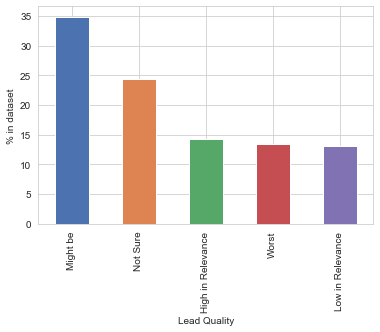

In [380]:
# For Lead Quality
percent_plot('Lead Quality')

In [381]:
# Null values in the 'Lead Quality' column can be replaced with the value 'Not Sure'.
df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan, 'Not Sure')

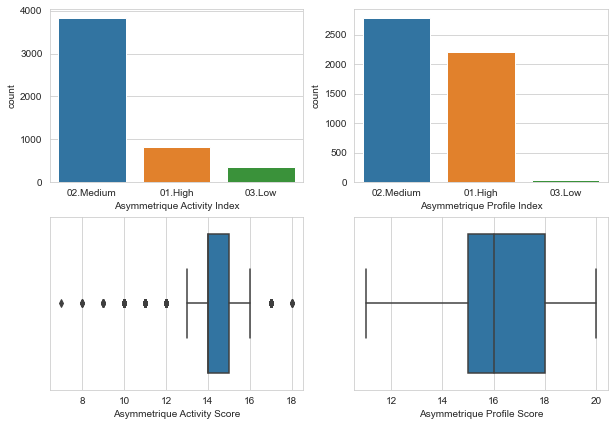

In [382]:
# 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(df_leads[var])
    else:
        sns.boxplot(df_leads[var])
plt.show()

In [383]:
# describe numerical variables
df_leads[asym_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.00,5022.00
mean,14.31,16.34
std,1.39,1.81
min,7.00,11.00
25%,14.00,15.00
50%,14.00,16.00
75%,15.00,18.00
max,18.00,20.00


In [384]:
# dropping asym_list columns as there is a lot of variation in them. 
df_leads = df_leads.drop(asym_list,1)

In [385]:
# get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

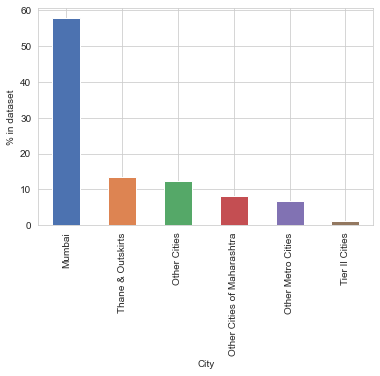

In [386]:
# Plotting 'City'
percent_plot('City')

In [387]:
# Around 60% of the City values are Mumbai. We can put 'Mumbai' in the missing values.
df_leads['City'] = df_leads['City'].replace(np.nan, 'Mumbai')

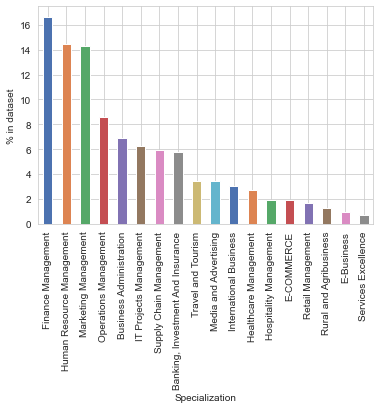

In [388]:
# Plotting 'Specialization'
percent_plot('Specialization')

In [389]:
# Due to lot of different specializations and it's not accurate to directly take the mean. 
# May be the person does not have a specialization or his/her specialization is not listed. 
# We can create a new column for that.

df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

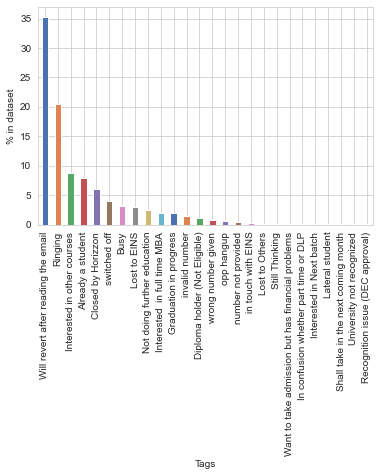

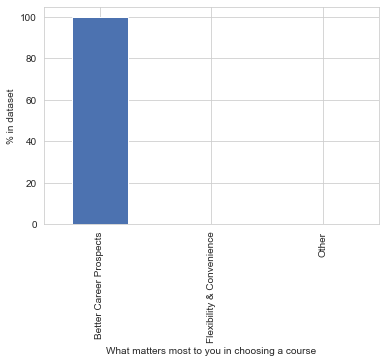

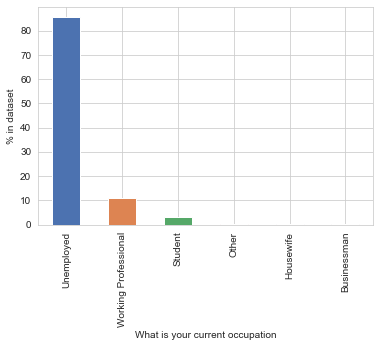

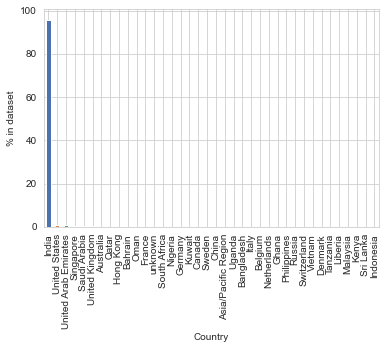

In [390]:
# Plotting 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for var in var_list:
    percent_plot(var)
    plt.show()

In [391]:
# In all the above categorical variables, one value is clearly more frequent than all others. 
# Hence we can impute with the most frequent values.

for var in var_list:
    top_frequent = df_leads[var].describe()['top']
    df_leads[var] = df_leads[var].replace(np.nan, top_frequent)

In [392]:
# getting percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                     0.00
Lead Source                                     0.39
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     1.48
Total Time Spent on Website                     0.00
Page Views Per Visit                            1.48
Last Activity                                   1.11
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                         

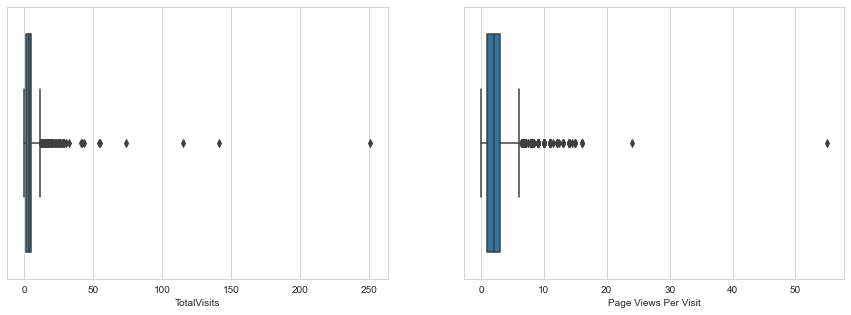

,TotalVisits,Page Views Per Visit
count,9103.00,9103.00
mean,3.45,2.36
std,4.85,2.16
min,0.00,0.00
25%,1.00,1.00
50%,3.00,2.00
75%,5.00,3.00
max,251.00,55.00


In [393]:
# Analyzing 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

df_leads[visit_list].describe()

In [394]:
# From the above analysis, we observe that there is a lot of variation in both of the variables. 
# As the percentage of missing values for both of them are less than 2%, it is better to drop the rows having missing values.

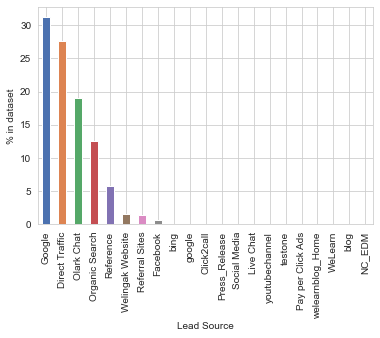

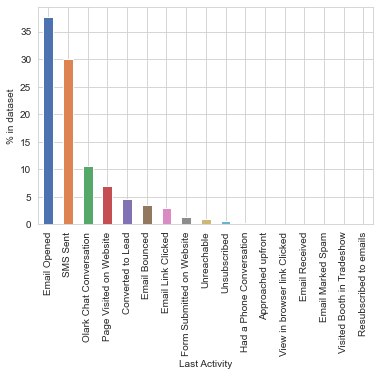

In [395]:
# Plotting 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

In [396]:
# based on above plots, we'll drop the rows containing any missing values for 'TotalVisits', 'Page Views Per Visit', 'Lead Source' and 'Last Activity'.
df_leads.dropna(inplace = True)

In [397]:
# Check percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                         

In [398]:
# Data is cleaned, no more null values.

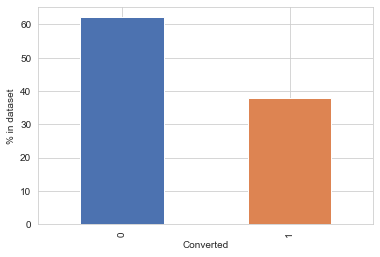

In [399]:
# Plotting target variable 'Converted'
percent_plot('Converted')

In [400]:
# calculate percentage of converted leads
(sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100

37.85541106458012

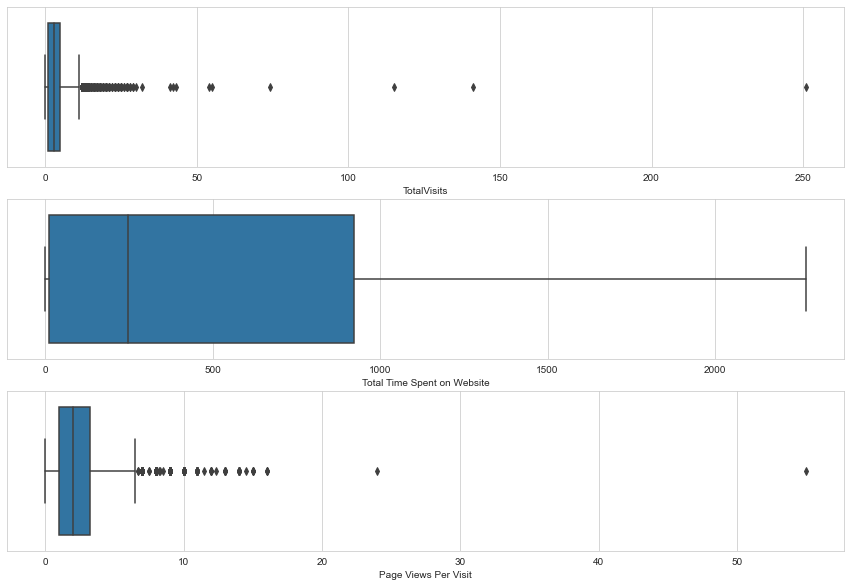

In [401]:
# Numerical variables analysis using Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

In [402]:
# boxplots show that we have outliers in the data. 
# checking numerically the values of outliers for better understanding and treatment
df_leads[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00
mean,3.46,482.89,2.37
std,4.86,545.26,2.16
min,0.00,0.00,0.00
5%,0.00,0.00,0.00
25%,1.00,11.00,1.00
50%,3.00,246.00,2.00
75%,5.00,922.75,3.20
90%,7.00,1373.00,5.00
95%,10.00,1557.00,6.00


In [403]:
# 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we can cap these outliers at 95% value.
# There are no significant outliers in 'Total Time Spent on Website'
# 'Page Views Per Visit', similar to 'TotalVisits', we can cap outliers at 95% value.
# Outlier treatment
percentile = df_leads['TotalVisits'].quantile([0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df_leads['Page Views Per Visit'].quantile([0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentile[0]] = percentile[0]

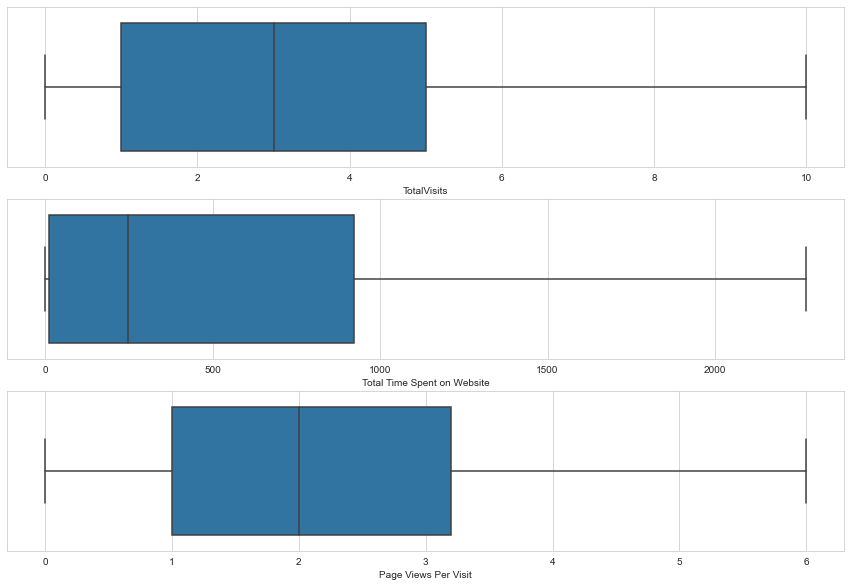

In [404]:
# verifying boxplots after outliers treatment 
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

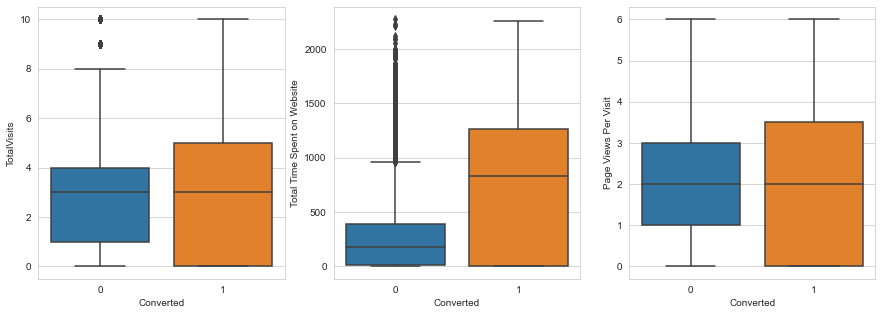

In [405]:
# plotting numerical variables against target variable to find relationship
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df_leads)
plt.show()

In [406]:
# Categorical variables
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [407]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = df_leads)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = df_leads)
        plt.xticks(rotation = 90)
    plt.show()

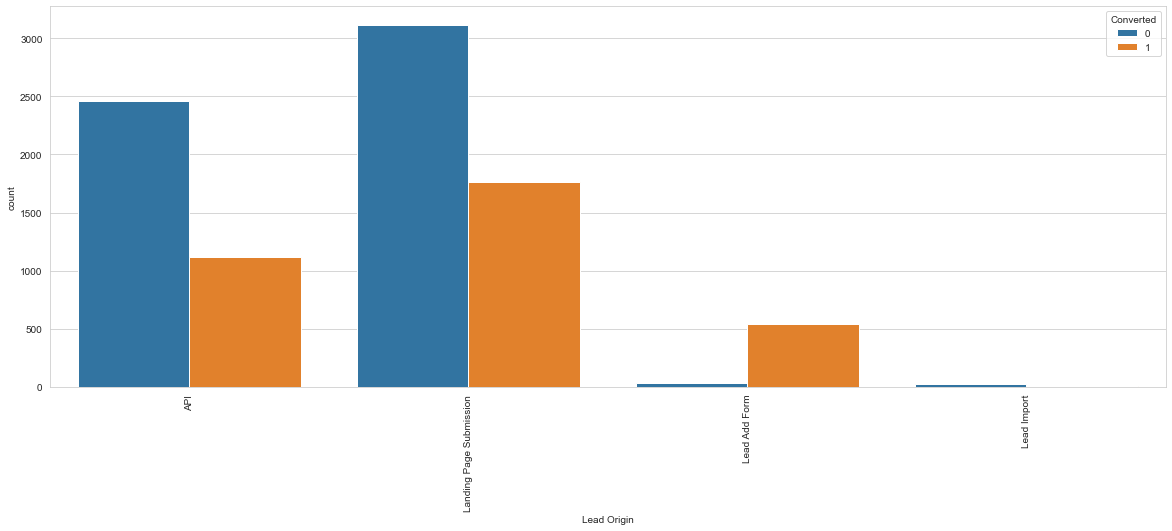

In [408]:
# Lead Origin
plot_cat_var(cat_var[0])

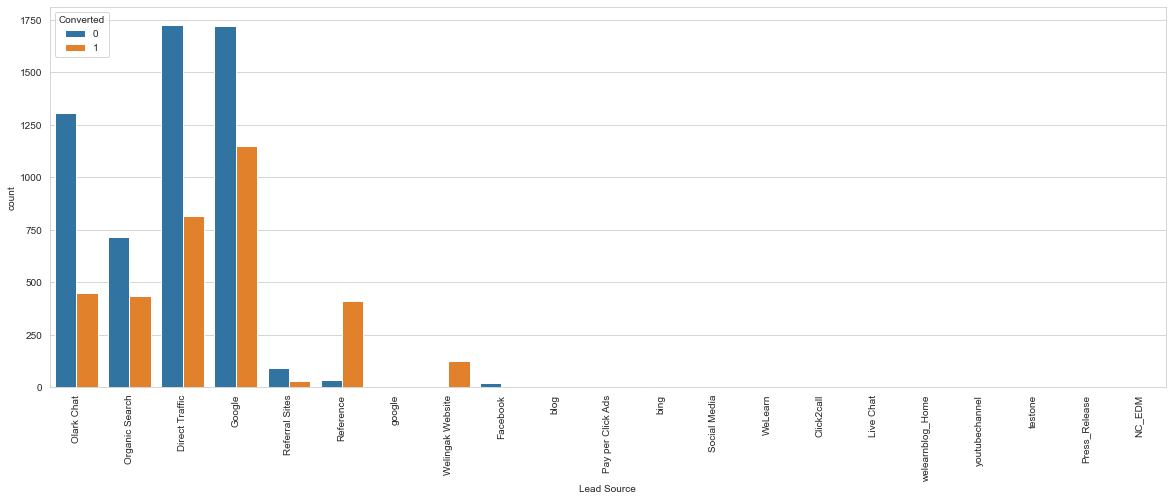

In [409]:
# Lead Source
plot_cat_var(cat_var[1])

In [410]:
# mering google and Google as one
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')

In [411]:
# dividing into categories
categories = df_leads['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [412]:
# We can take first 8 categories and clean the remaining
df_leads['Lead Source'] = df_leads['Lead Source'].replace(categories[8:], 'Others')

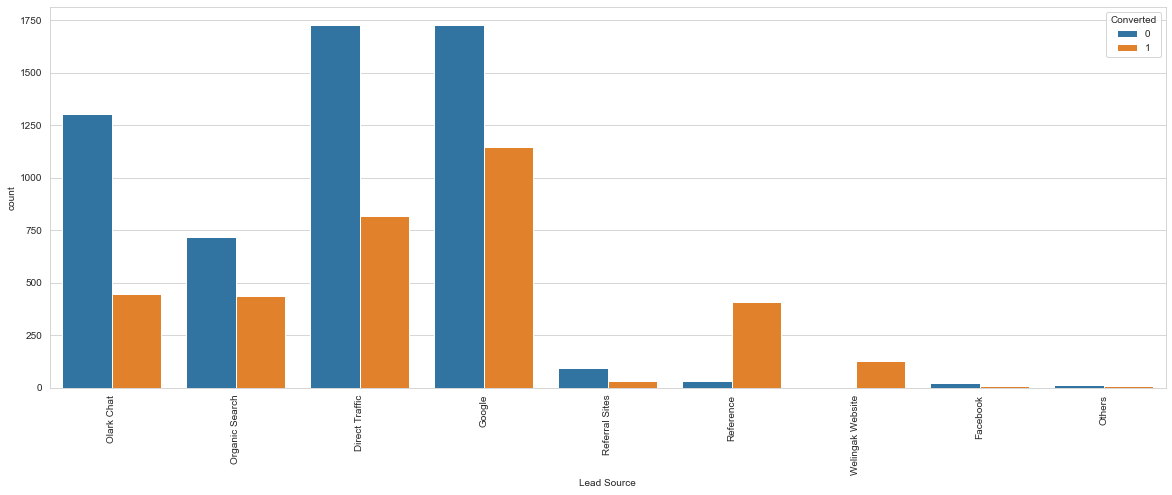

In [413]:
# plot updated categories
plot_cat_var(cat_var[1])

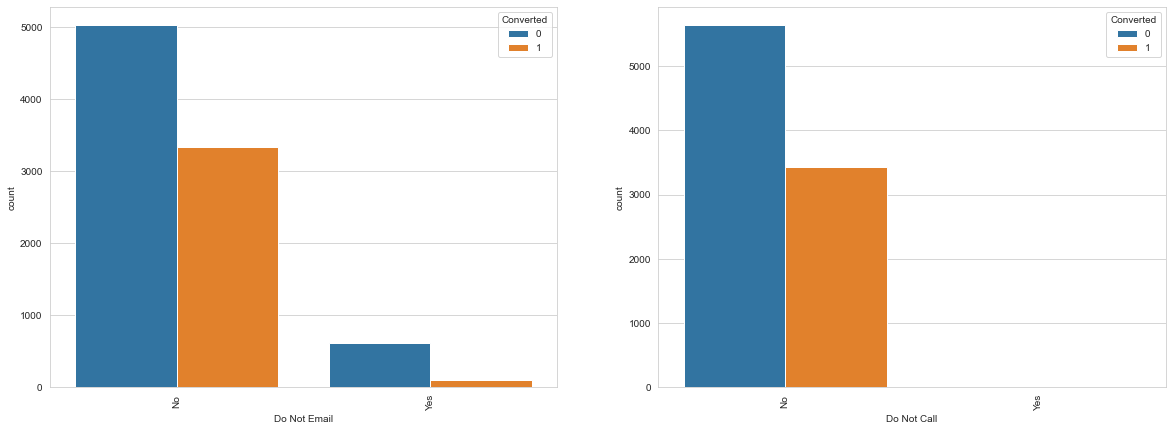

In [414]:
# plotting Do Not Email or call
plot_cat_vars([cat_var[2],cat_var[3]])

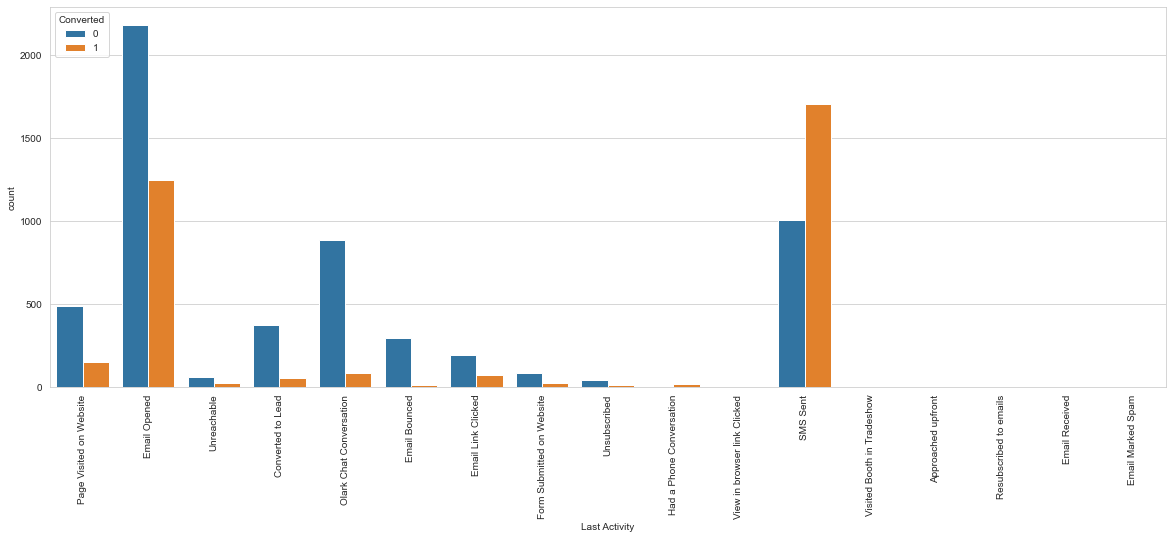

In [415]:
# Last activity plot
plot_cat_var(cat_var[4])

In [416]:
# Caterizing
categories = df_leads['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [417]:
# reducing unnessary categories
df_leads['Last Activity'] = df_leads['Last Activity'].replace(categories[-5:], 'Others')

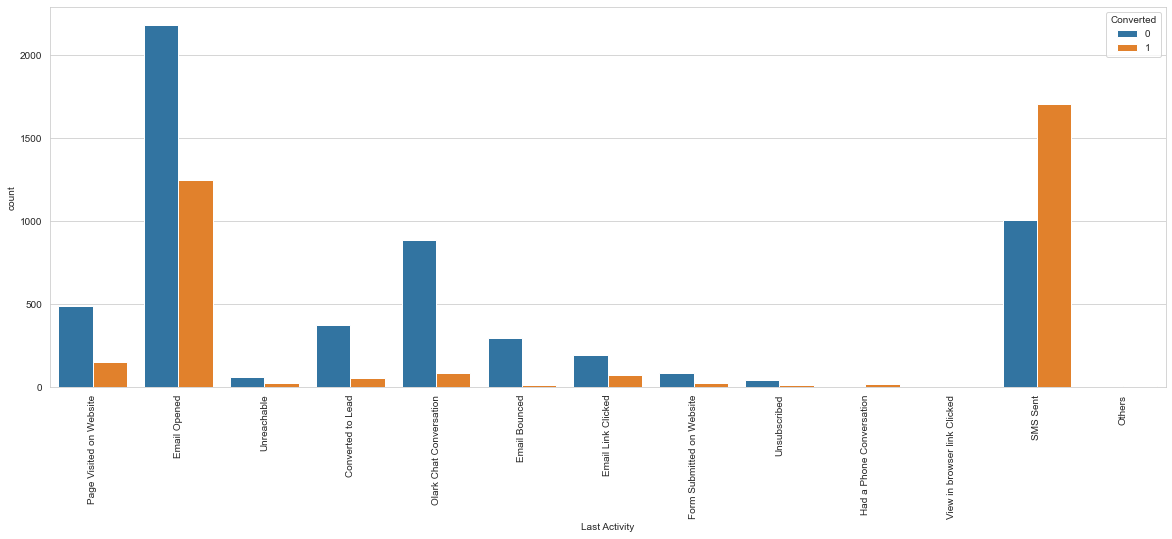

In [418]:
# plot with new categories
plot_cat_var(cat_var[4])

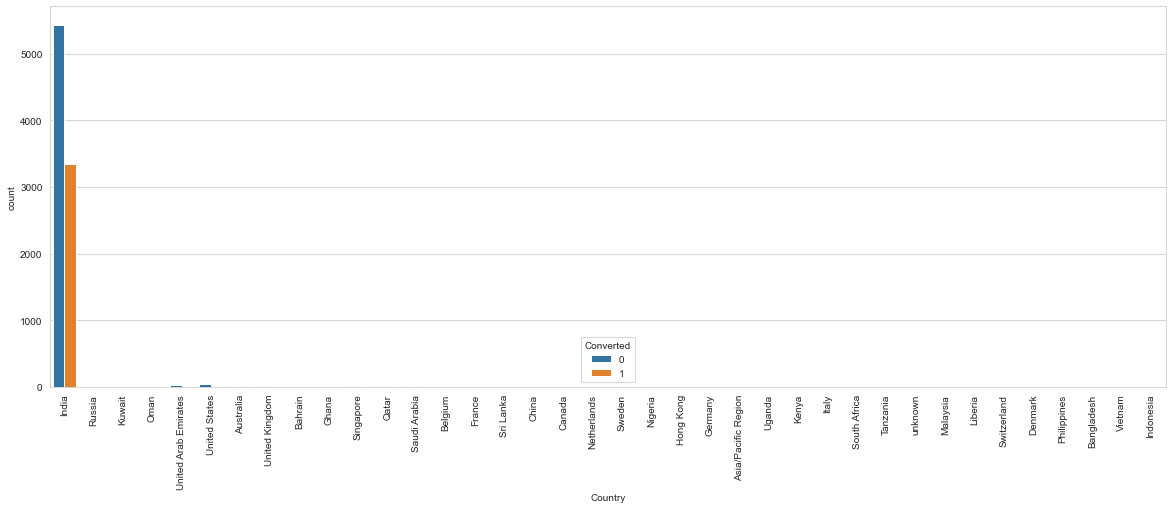

In [419]:
# country
plot_cat_var(cat_var[5])

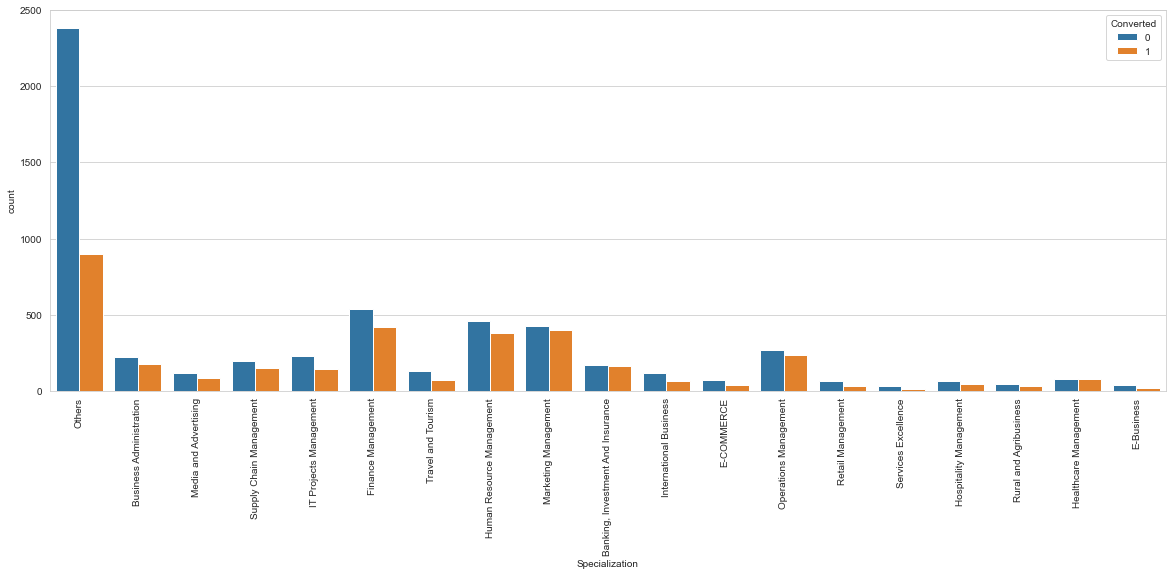

In [420]:
# specialization
plot_cat_var(cat_var[6])

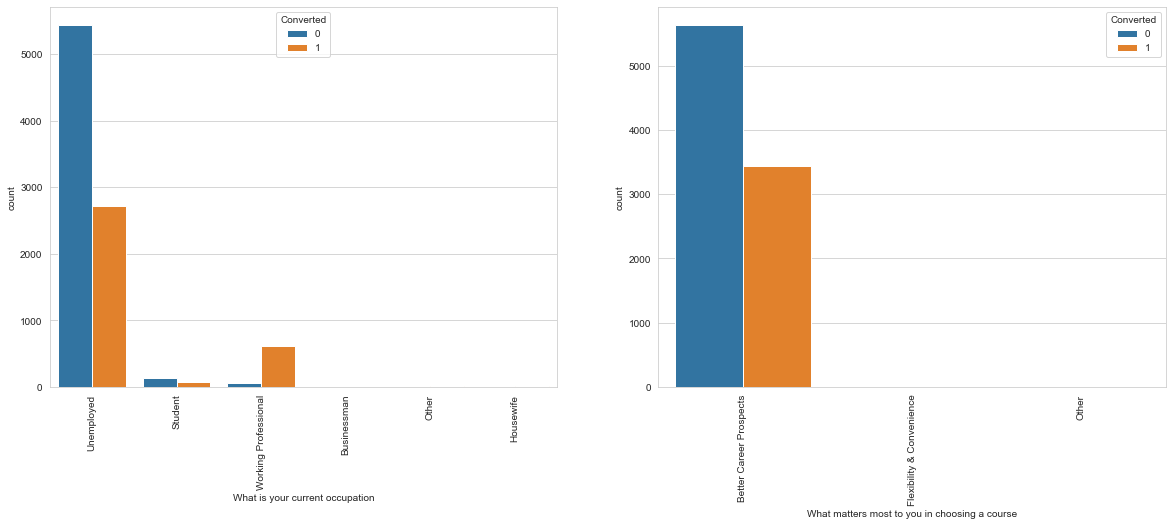

In [421]:
# What is your current occupation and What matters most to you in choosing a course 
plot_cat_vars([cat_var[7],cat_var[8]])

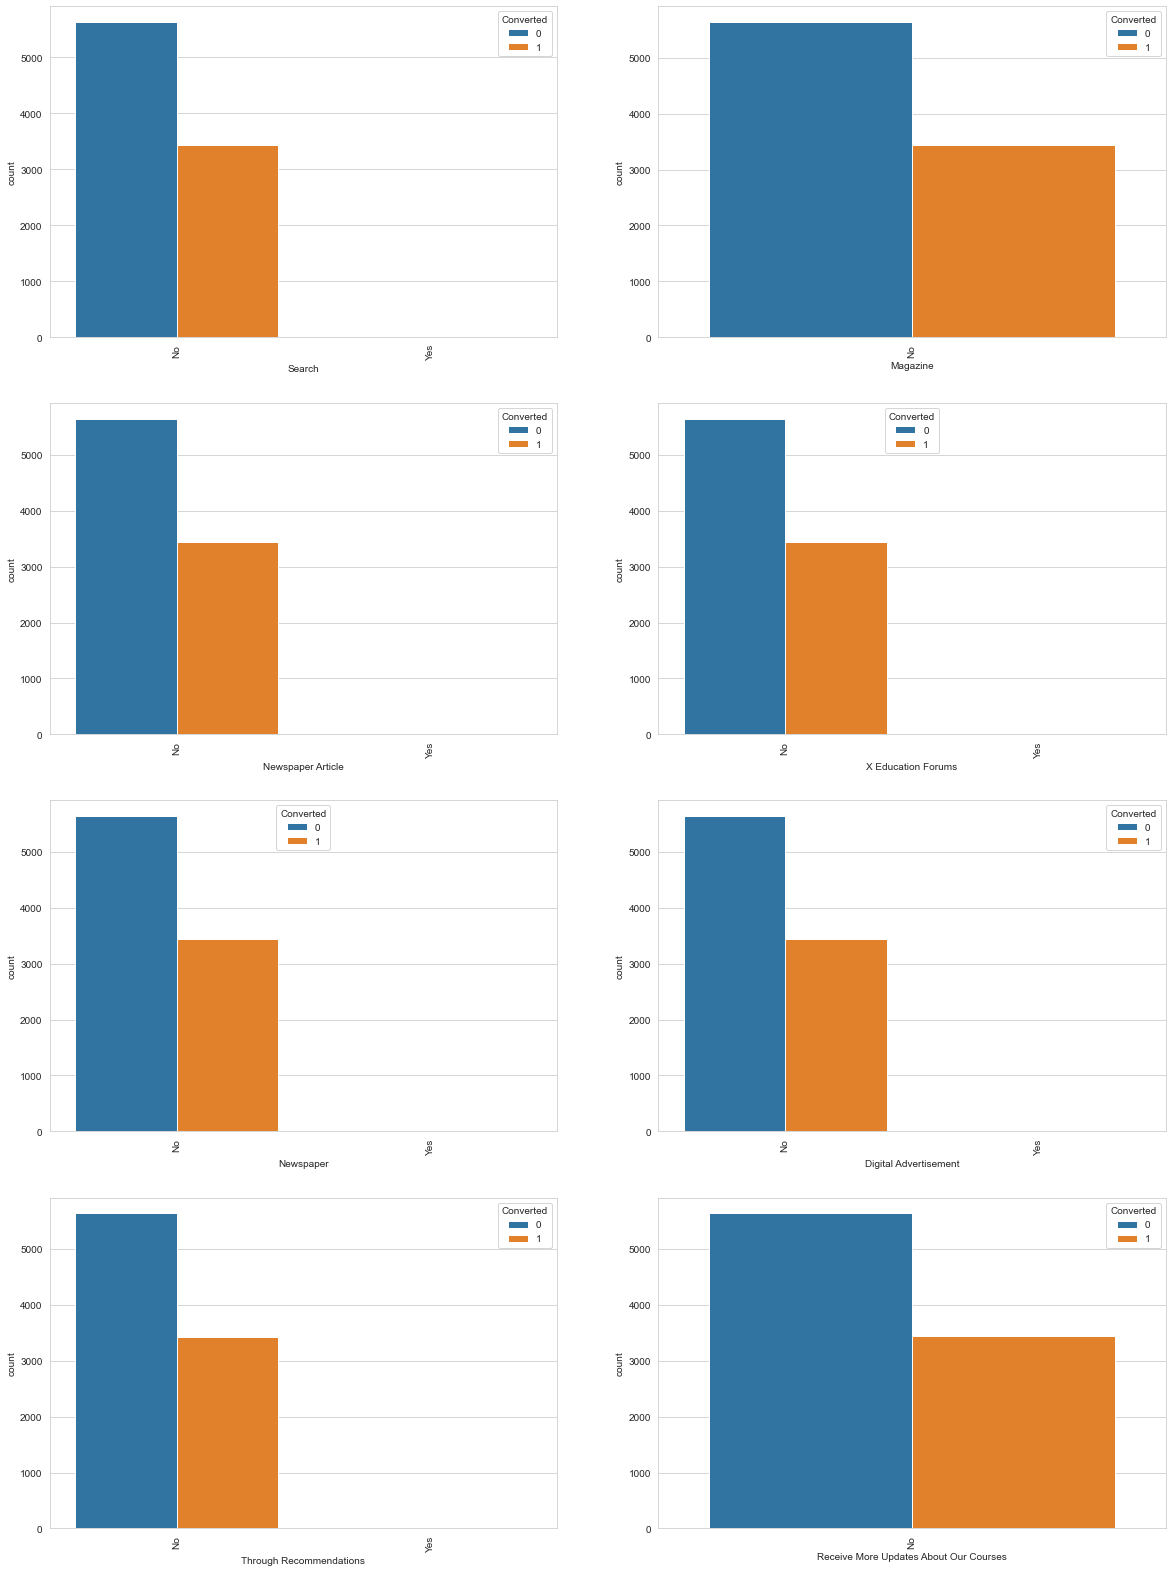

In [422]:
# Plots for Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses
plot_cat_vars(cat_var[9:17])

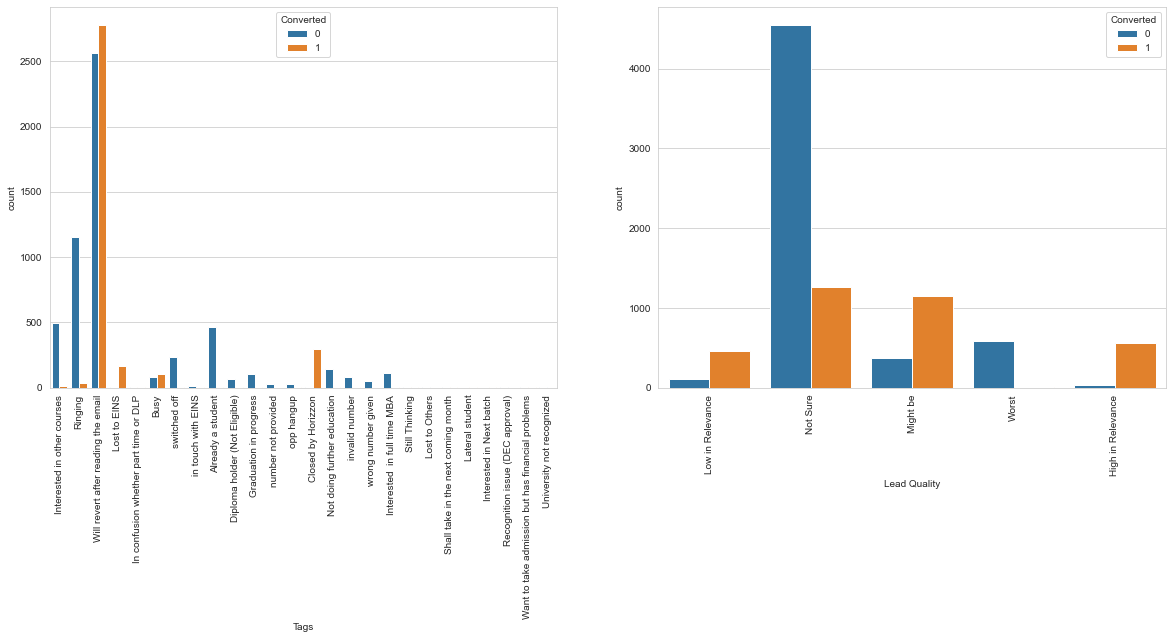

In [423]:
# plots for Tags and Lead Quality
plot_cat_vars([cat_var[17],cat_var[18]])

In [424]:
# categorize tags
categories = df_leads['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [425]:
# combine last 8 categories
df_leads['Tags'] = df_leads['Tags'].replace(categories[-8:], 'Others')

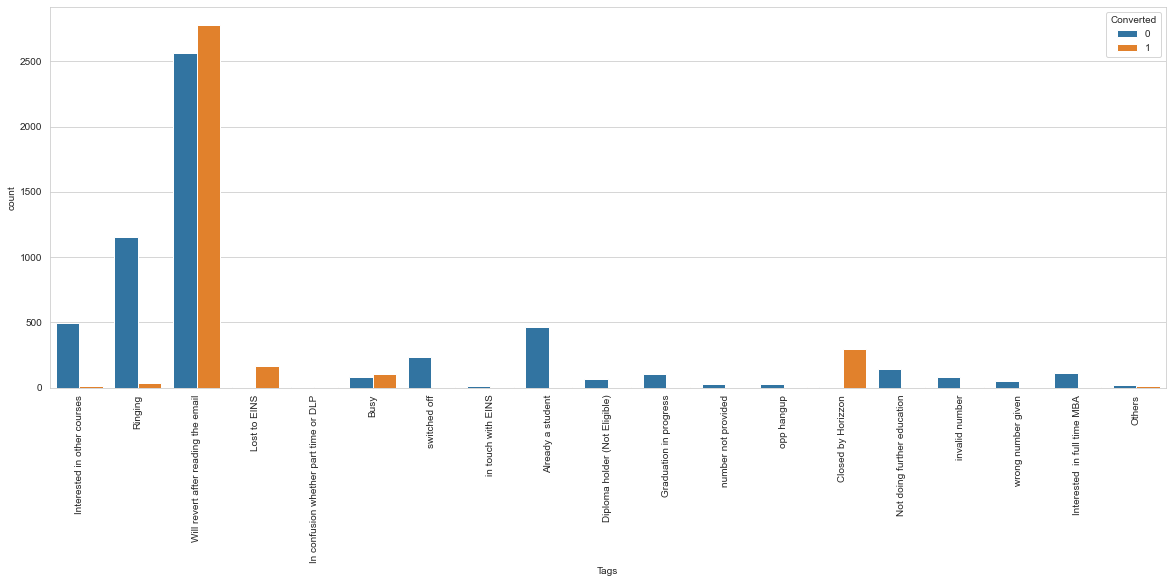

In [426]:
# Tags with new categories
plot_cat_var(cat_var[17])

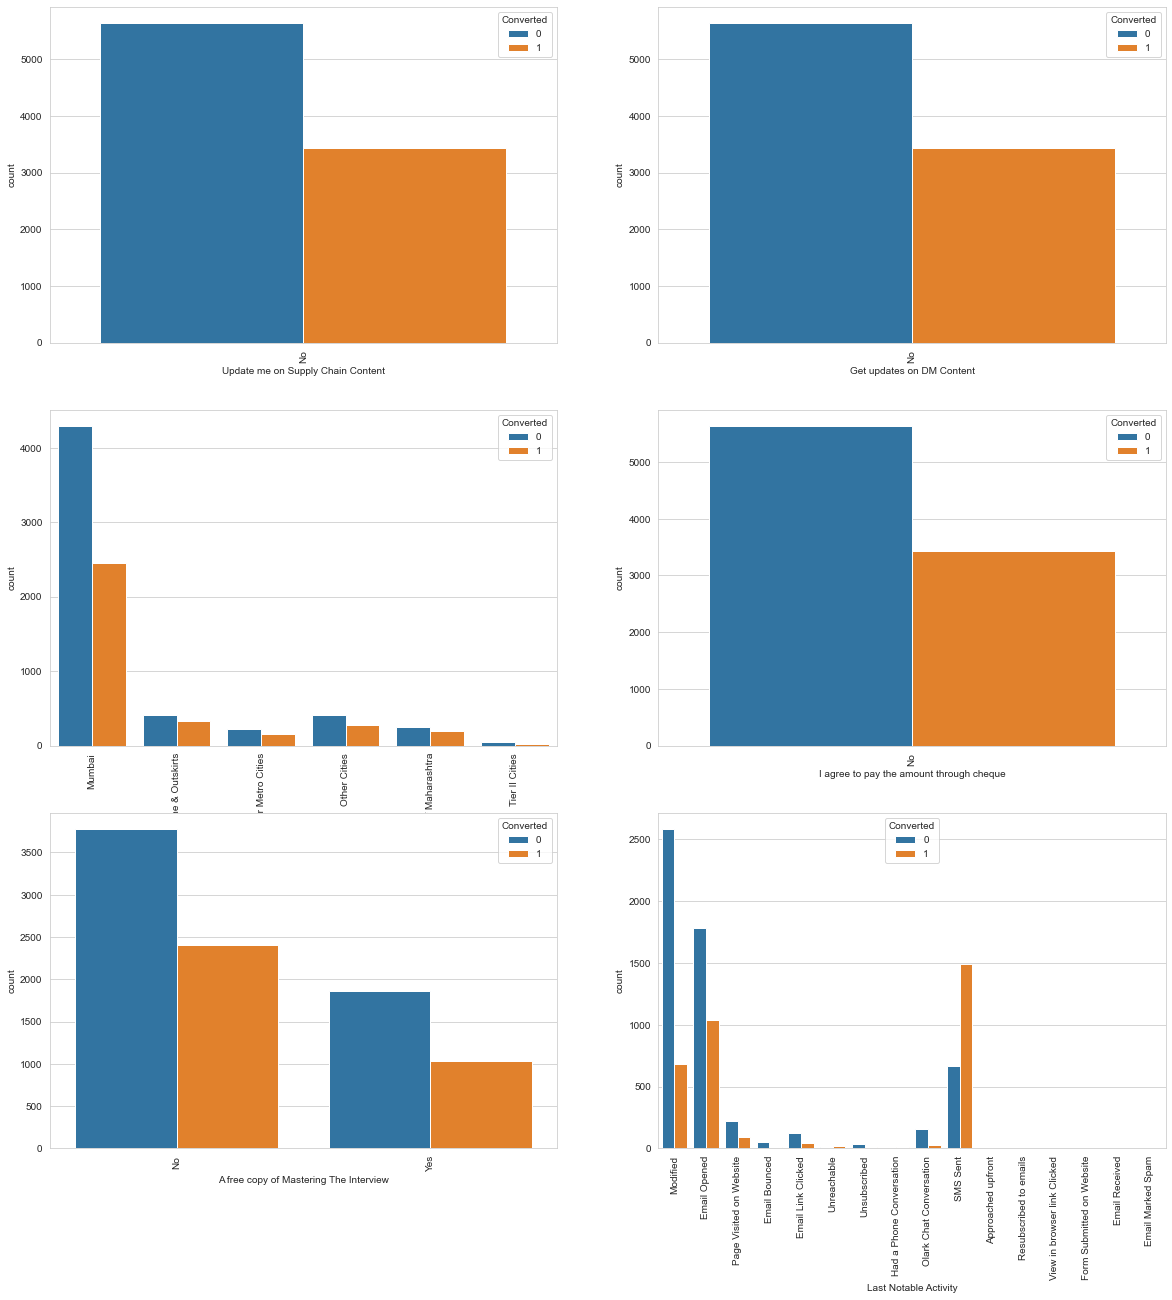

In [427]:
# Plotting Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, and Last Notable Activity
plot_cat_vars(cat_var[19:25])

In [428]:
# caterorizing Last Notable Activity
categories = df_leads['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [429]:
# removing last 6 categories
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(categories[-6:], 'Others')

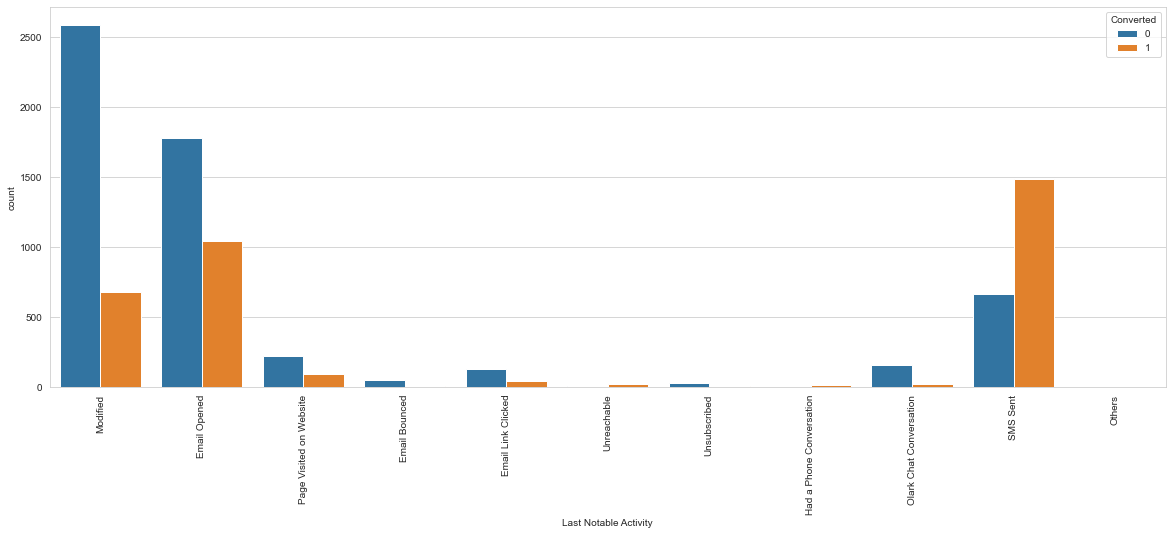

In [430]:
# plot 'Last Notable Activity' with updated categories
plot_cat_var(cat_var[24])

In [431]:
# removing the variables which are not significant for analysis
df_leads = df_leads.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],1)

In [432]:
# Final dataframe
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [433]:
# check shape
df_leads.shape

(9074, 14)

In [434]:
# info about data frame
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                

In [435]:
# describe the dataframe
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00,9074.00
mean,0.38,3.19,482.89,2.27
std,0.49,2.78,545.26,1.79
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,11.00,1.00
50%,0.00,3.00,246.00,2.00
75%,1.00,5.00,922.75,3.20
max,1.00,10.00,2272.00,6.00


In [436]:
# convert binary variable (Yes/No) to 0/1
df_leads['Do Not Email'] = df_leads['Do Not Email'].map({'Yes': 1, 'No': 0})

In [437]:
# Categorical variables
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [438]:
# create dummy variables and drop first ones
dummy = pd.get_dummies(df_leads[cat_var], drop_first=True)

# To add result to the original dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

# To drop the original variables
df_leads = df_leads.drop(cat_var,1)

In [439]:
df_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.00,1532,2.00,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.00,1428,1.00,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [440]:
# Importing required package for train_test_split
from sklearn.model_selection import train_test_split

In [441]:
# Putting feature variable to X
X = df_leads.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.00,0,0.00,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.00,1532,2.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.00,1428,1.00,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [442]:
# putting response variable to y
y = df_leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [443]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [444]:
# Importing required package for Feature Scaling
from sklearn.preprocessing import StandardScaler

In [445]:
scaler = StandardScaler()

In [446]:
# Numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [447]:
# Applying scaler to all numerical variables
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,-0.43,-0.16,-0.16,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,-0.43,-0.54,-0.16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.15,-0.89,-1.27,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4750,0,-0.43,1.64,-0.16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0.64,2.02,0.12,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [448]:
# check the conversion rate
conversion = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
conversion

37.85541106458012

In [449]:
# Using RFE first for feature elimination out of many features available

In [450]:
# create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [451]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [452]:
# get output of RFE
rfe.support_

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False])

In [453]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Others', False, 48),
 ('Lead Source_Reference', False, 72),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 51),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Opened', False, 71),
 ('Last Activity_Form Submitted on Website', False, 73),
 ('Last Activity_Had a Phone Conversation', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Others', False, 34),
 ('Last Activity_Page Visited on Website', False, 40),
 ('Last

In [454]:
# selected Features 
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [455]:
# Dropped Features
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthca

In [456]:
# Model with StatsModels

In [457]:
# import required package
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [458]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [459]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [460]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [461]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

In [462]:
# Model 1
# Running the first model by using the features selected by RFE

X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.2
Date:                Mon, 14 Nov 2022   Deviance:                       3176.4
Time:                        09:49:55   Pearson chi2:                 3.57e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [463]:
# Tags_invalid number has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.
col1 = col.drop('Tags_invalid number',1)

In [464]:
# Model 2
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.2
Date:                Mon, 14 Nov 2022   Deviance:                       3190.4
Time:                        09:49:55   Pearson chi2:                 3.49e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [465]:
# Tags_number not provided has a very high p-value > 0.05. Hence, can be dropped.
col2 = col1.drop('Tags_number not provided',1)

In [466]:
# Model 3
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.7
Date:                Mon, 14 Nov 2022   Deviance:                       3197.4
Time:                        09:49:55   Pearson chi2:                 3.48e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [467]:
# Tags_wrong number given has a very high p-value > 0.05. Hence, can be dropped.
col3 = col2.drop('Tags_wrong number given',1)

In [468]:
# Model 4
X4, logm4 = build_model(X_train[col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Mon, 14 Nov 2022   Deviance:                       3202.0
Time:                        09:49:55   Pearson chi2:                 3.48e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [469]:
# check VIFs (Variance Inflation Factors) of features to find if there's any multicollinearity present
check_VIF(X4)

,Features,VIF
9,Lead Quality_Not Sure,2.62
7,Tags_Will revert after reading the email,2.57
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.52
11,Last Notable Activity_SMS Sent,1.51
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.10
3,Tags_Busy,1.10
8,Tags_switched off,1.10


<AxesSubplot:>

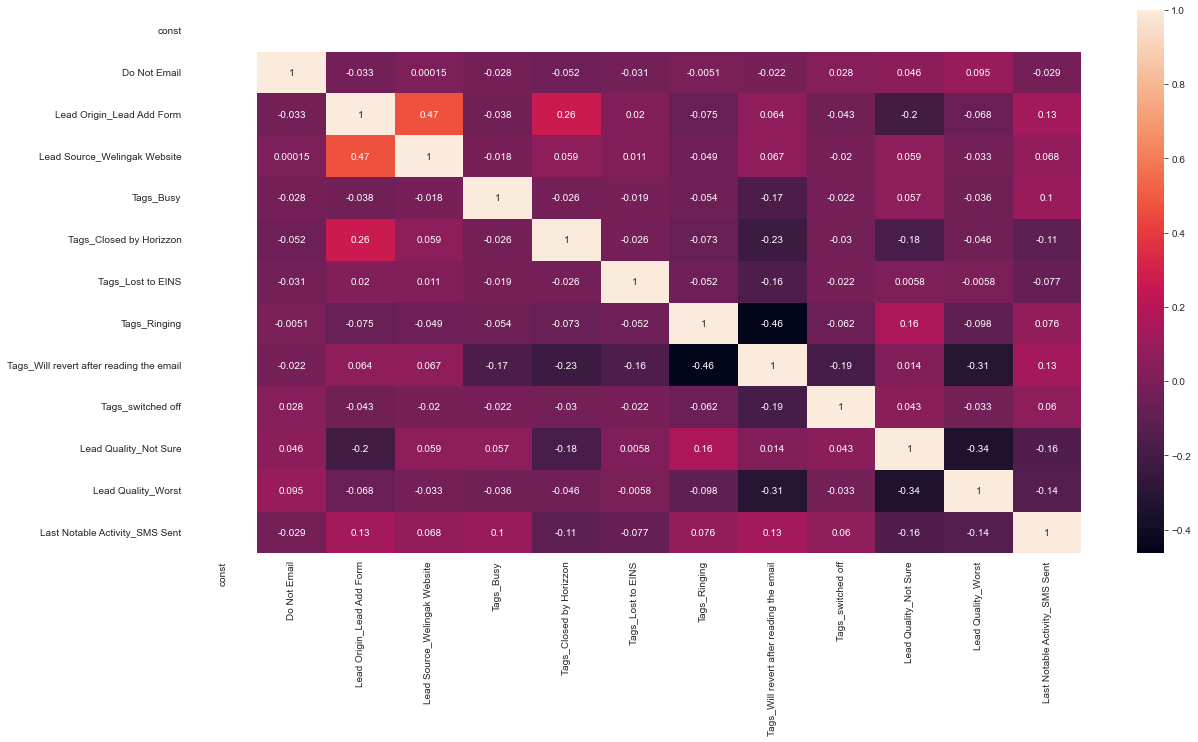

In [470]:
# correlations heat map
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

In [471]:
# get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.19,3009,0
1,0,0.06,1012,0
2,0,0.00,9226,0
3,1,0.78,4750,1
4,1,0.98,7987,1


In [472]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3751  154]
 [ 357 2089]]
Training Accuracy:  0.9195402298850575


In [473]:
other_metrics(confusion)

Sensitivity:  0.8540474243663123
Specificity:  0.9605633802816902
False postive rate - predicting the lead conversion when the lead does not convert:  0.03943661971830986
Positive predictive value:  0.9313419527418636
Negative predictive value:  0.9130963972736125


In [474]:
# This is our final model because,
# a. All p-values are very close to zero.
# b. VIFs for all features are very low. There is hardly any multicollinearity present.
# c. Training accuracy of 91.95% at a probability threshold of 0.05 is also very good.

In [475]:
# Function to plot ROC Curve
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [476]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

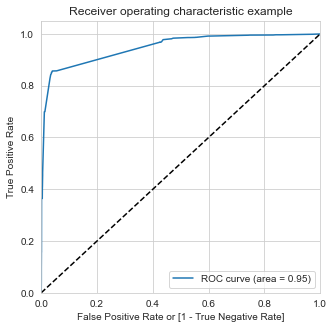

In [477]:
# plotting ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [478]:
# area under curve calculation
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9488012517235278


In [479]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.06,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1


In [480]:
# calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.39   1.00   0.00
0.10  0.10      0.71   0.98   0.53
0.20  0.20      0.91   0.86   0.94
0.30  0.30      0.92   0.86   0.96
0.40  0.40      0.92   0.86   0.96
0.50  0.50      0.92   0.85   0.96
0.60  0.60      0.92   0.85   0.96
0.70  0.70      0.92   0.84   0.97
0.80  0.80      0.88   0.70   0.99
0.90  0.90      0.79   0.46   0.99


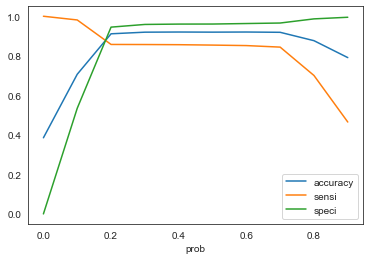

In [481]:
# plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [482]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.06,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [483]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3750  155]
 [ 352 2094]]
Training Accuracy:  0.9201700519603212


In [484]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.8560915780866721
Specificity:  0.9603072983354674
False postive rate - predicting the lead conversion when the lead does not convert:  0.03969270166453265
Positive predictive value:  0.9310804802134282
Negative predictive value:  0.9141882008776206


In [485]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3905
           1       0.93      0.86      0.89      2446

    accuracy                           0.92      6351
   macro avg       0.92      0.91      0.91      6351
weighted avg       0.92      0.92      0.92      6351



In [486]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9313419527418636

In [487]:
# Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8540474243663123

In [488]:
from sklearn.metrics import precision_score, recall_score

In [489]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9313419527418636

In [490]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8540474243663123

In [491]:
from sklearn.metrics import precision_recall_curve

In [492]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [493]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

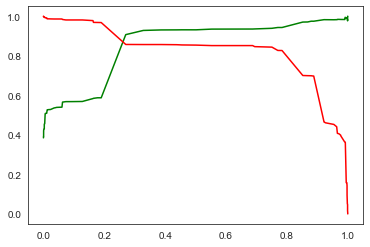

In [494]:
# plotting precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [495]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.06,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [496]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3690  215]
 [ 349 2097]]
Training Accuracy:  0.911195087387813


In [497]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.857318070318888
Specificity:  0.9449423815620999
False postive rate - predicting the lead conversion when the lead does not convert:  0.05505761843790013
Positive predictive value:  0.9070069204152249
Negative predictive value:  0.9135924733845011


In [498]:
# Feature transformation on Test set
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0.30,-0.59,1.00,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,0,0.67,1.89,1.56,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7936,0,-0.42,-0.74,-0.13,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,0,-1.14,-0.88,-1.27,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3830,0,1.75,-0.58,2.13,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [499]:
# get final features
X_test_sm = X_test[col3]

In [500]:
# add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [501]:
# Make predictions
y_test_pred = logm4.predict(X_test_sm)

y_test_pred[:10]

3271   0.19
1490   0.89
7936   0.19
4216   1.00
3830   0.19
1800   0.89
6507   0.01
4821   0.00
4223   1.00
4714   0.19
dtype: float64

In [502]:
# convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.19
1490,0.89
7936,0.19
4216,1.00
3830,0.19


In [503]:
# convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [504]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [505]:
# removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [506]:
# append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.19
1,1,1490,0.89
2,0,7936,0.19
3,1,4216,1.00
4,0,3830,0.19


In [507]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.19
1,1,1490,0.89
2,0,7936,0.19
3,1,4216,1.00
4,0,3830,0.19


In [508]:
# putting the threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.19,0
1,1,1490,0.89,1
2,0,7936,0.19,0
3,1,4216,1.00,1
4,0,3830,0.19,0


In [509]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9388647090311768


In [510]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1640   94]
 [ 157  832]]
Training Accuracy:  0.9078222548659567


In [511]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8412537917087968
Specificity:  0.9457900807381776
False postive rate - predicting the lead conversion when the lead does not convert:  0.05420991926182238
Positive predictive value:  0.8984881209503239
Negative predictive value:  0.9126321647189761


In [512]:
# Classification Report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1734
           1       0.90      0.84      0.87       989

    accuracy                           0.91      2723
   macro avg       0.91      0.89      0.90      2723
weighted avg       0.91      0.91      0.91      2723



In [513]:
# Model using PCA
# Importing PCA module
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

In [514]:
# PCA on train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [515]:
pca.explained_variance_ratio_

array([3.00501636e-01, 1.06850908e-01, 7.67663612e-02, 5.95935634e-02,
       4.73450926e-02, 3.95001745e-02, 3.31725446e-02, 3.07851106e-02,
       2.76345840e-02, 1.78206561e-02, 1.48530803e-02, 1.42208645e-02,
       1.31865081e-02, 1.30596995e-02, 1.22195330e-02, 1.18979594e-02,
       1.02536298e-02, 9.91063791e-03, 9.31979932e-03, 9.21948275e-03,
       8.79214960e-03, 8.15381968e-03, 7.23170307e-03, 6.79343574e-03,
       6.72774284e-03, 6.04041701e-03, 5.94806451e-03, 5.59830334e-03,
       5.24004947e-03, 5.03313391e-03, 4.33975888e-03, 4.13173275e-03,
       3.88244728e-03, 3.70233147e-03, 3.31368322e-03, 3.05020671e-03,
       2.93050385e-03, 2.85180990e-03, 2.75024788e-03, 2.65447354e-03,
       2.56010006e-03, 2.47472432e-03, 2.36024669e-03, 2.24204506e-03,
       2.13419823e-03, 1.88583794e-03, 1.87689441e-03, 1.81039631e-03,
       1.68719830e-03, 1.59916563e-03, 1.56998317e-03, 1.56063339e-03,
       1.54588520e-03, 1.45192521e-03, 1.36220017e-03, 1.24379120e-03,
      

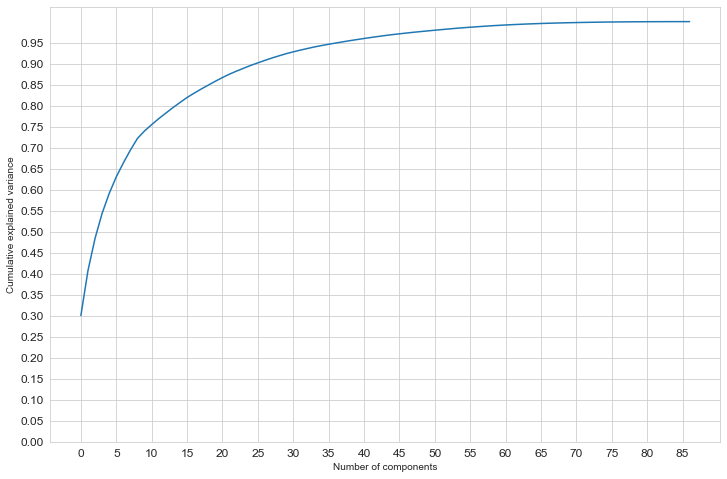

In [516]:
# making the screeplot

fig = plt.figure(figsize = (12,8))
# To set style to grids for better visualisation
sns.set_style('whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xticks(np.arange(0, 90, step=5), size = 12)
plt.yticks(np.arange(0.0, 1.0, step=0.05), size = 12)
plt.show()

In [517]:
# Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=25)

In [518]:
# Use principal components of the train data
df_train_pca = pca_final.fit_transform(X_train)

df_train_pca.shape

(6351, 25)

In [519]:
# create correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

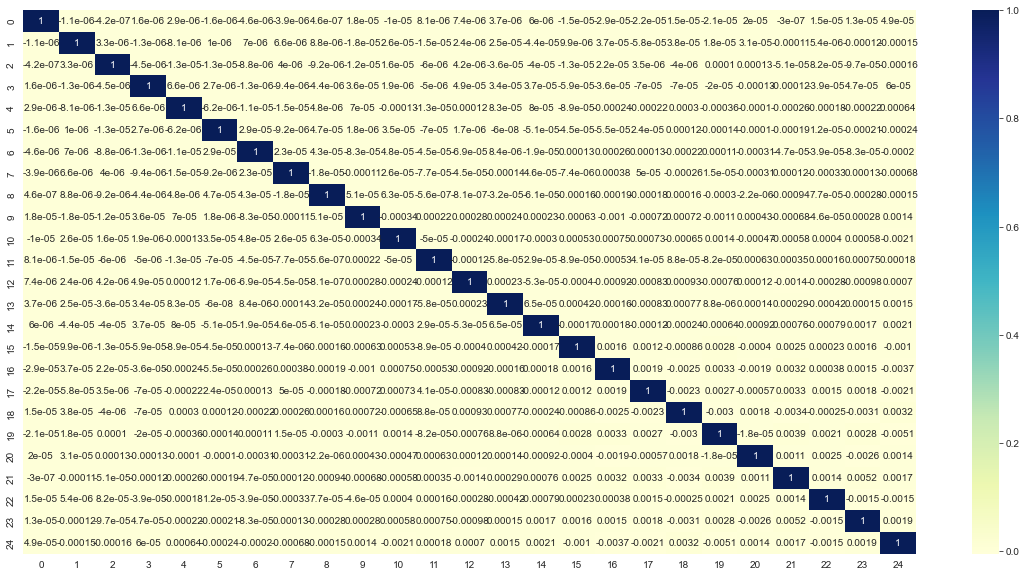

In [520]:
# plot the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True,cmap="YlGnBu")

In [521]:
# apply selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2723, 25)

In [522]:
# Apply Logistic Regression on Principal Components
# train the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [523]:
# Making Predictions
# On train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
print("Area under curve: ", metrics.roc_auc_score(y_train, pred_probs_train))

Area under curve:  0.9433320281459813


In [524]:
# On test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
print("Area under curve: ", metrics.roc_auc_score(y_test, pred_probs_test))

Area under curve:  0.92809573124438


In [525]:
# After comparing both the models, our first model using RFE and manual feature elimination is better than the model built using PCA.

In [526]:
# Assign Lead Score
# This needs to be calculated for all the leads from the original dataset (train + test).

# test set
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.19,0
1,1,1490,0.89,1
2,0,7936,0.19,0
3,1,4216,1.00,1
4,0,3830,0.19,0


In [527]:
# train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.06,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [528]:
# dropping unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.19,0
1,1012,0,0.06,0
2,9226,0,0.00,0
3,4750,1,0.78,1
4,7987,1,0.98,1


In [529]:
# concatenate two datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.19,0
1,1012,0,0.06,0
2,9226,0,0.00,0
3,4750,1,0.78,1
4,7987,1,0.98,1


In [530]:
# check the shape of the final dataset
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [531]:
# Lead Score calculation
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.19,0,19
1,1012,0,0.06,0,6
2,9226,0,0.00,0,0
3,4750,1,0.78,1,78
4,7987,1,0.98,1,98


In [532]:
# make the Lead ID column as index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.13,0,13
1,0,0.00,0,0
2,1,0.89,1,89
3,0,0.00,0,0
4,1,0.89,1,89


In [533]:
# get Lead Number column from original data
leads_original = df_leads_original[['Lead Number']]
leads_original.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [534]:
# concatenate both dataframes based on index
leads_with_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_with_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0.00,0.13,0.00,13.00
1,660728,0.00,0.00,0.00,0.00
2,660727,1.00,0.89,1.00,89.00
3,660719,0.00,0.00,0.00,0.00
4,660681,1.00,0.89,1.00,89.00


In [535]:
# features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Do Not Email                               -1.28
Lead Origin_Lead Add Form                   1.20
Lead Source_Welingak Website                3.28
Tags_Busy                                   3.80
Tags_Closed by Horizzon                     7.98
Tags_Lost to EINS                           9.19
Tags_Ringing                               -1.81
Tags_Will revert after reading the email    3.99
Tags_switched off                          -2.45
Lead Quality_Not Sure                      -3.52
Lead Quality_Worst                         -3.91
Last Notable Activity_SMS Sent              2.74
dtype: float64

In [536]:
# feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -13.96
Lead Origin_Lead Add Form                   13.09
Lead Source_Welingak Website                35.70
Tags_Busy                                   41.37
Tags_Closed by Horizzon                     86.78
Tags_Lost to EINS                          100.00
Tags_Ringing                               -19.71
Tags_Will revert after reading the email    43.40
Tags_switched off                          -26.60
Lead Quality_Not Sure                      -38.30
Lead Quality_Worst                         -42.53
Last Notable Activity_SMS Sent              29.79
dtype: float64

In [537]:
# sort the features
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                10
Lead Origin_Lead Add Form                    9
Lead Source_Welingak Website                 8
Tags_Busy                                    6
Tags_Closed by Horizzon                      0
Tags_Lost to EINS                            1
Tags_Ringing                                11
Tags_Will revert after reading the email     2
Tags_switched off                            3
Lead Quality_Not Sure                        7
Lead Quality_Worst                           4
Last Notable Activity_SMS Sent               5
dtype: int64

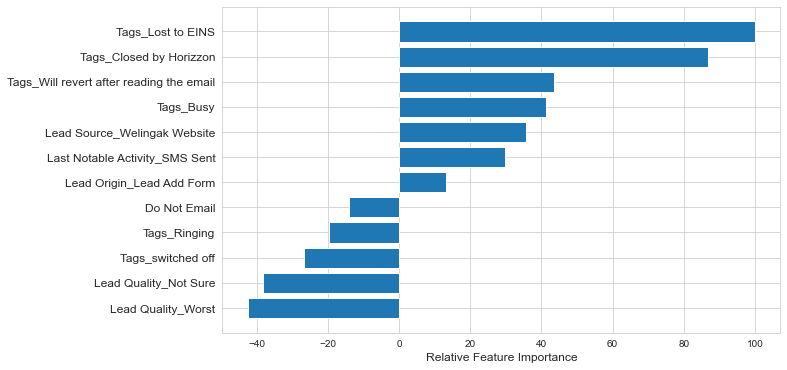

In [538]:
# plotting features 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

In [539]:
# After trying out several models, our final model has following findings:
# All p-values are very close to zero.
# VIFs for all features are very low. There is hardly any multicollinearity present.
# The overall testing accuracy of 90.78% at a probability threshold of 0.05 is good.